cld : Monthly Cloud Cover in percent

dtr : Diurnal Temperature Range in degrees
Celsius

frs : frost day frequency in a month

pet : potential evapotranspiration in
millimeters per day

pre : Precipitation is any product of the
condensation of water vapor in the
atmosphere in millimeters per month

tmn : daily mean temperature in degrees
Celsius

tmp : Temperature in degrees Celsius

tmx : monthly average maximum and
minimum temperature in degrees
Celsius

vape : vapor pressureis in hectopascals

wet : wet day frequency in days

x : longitude x axis spatial coordinates

y : latitude y-axis spatial coordinate

Region : the continent of the outbreak

country : country of outbreak

Reportingdate
: reporting date of outbreak

elevation : altitude of geographic location in
meters

dominant_landcover: dominant land cover

X5_Ct_2010_Da: quick view GIS file of dasymetriccattle

X5_Bf_2010_Da: quick view of GIS files from dasymetric buffalo

lumpy : classification of whether infected with

LSD code: 1, not infected with code: 0

Loading important libraries.

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno

ModuleNotFoundError: No module named 'plotly'

We load the given the dataset.

In [3]:
df = pd.read_csv('"C:/Users/asrah/Desktop/asra docs/asra documents/odin notes/data/current/lumpy/Lumpy skin disease data.csv"')

FileNotFoundError: [Errno 2] No such file or directory: '/content/Lumpy skin disease data.csv'

Check for null values.

In [ ]:
df.isnull().sum() #checking for null values

As it is possible to restore the missing values in the dataset, we use latitude and longitude to determine the missing regions and the countries in the dataset. The already existing python library "pycountry" is installed for this purpose.

In [ ]:
! pip install geopy pycountry-convert tqdm -q

In [ ]:
import numpy as np
import pandas as pd
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import pycountry_convert as pc

from pprint import pprint
from typing import Tuple

from tqdm import tqdm
tqdm.pandas()

In [ ]:
def get_continent_name(continent_code: str) -> str:
    continent_dict = {
        "NA": "North America",
        "SA": "South America",
        "AS": "Asia",
        "AF": "Africa",
        "OC": "Oceania",
        "EU": "Europe",
        "AQ" : "Antarctica"
    }
    return continent_dict[continent_code]

get_continent_name("EU")

In [ ]:
def get_continent(lat: float, lon:float) -> Tuple[str, str]:
    geolocator = Nominatim(user_agent="<username>@gmail.com", timeout=10)
    geocode = RateLimiter(geolocator.reverse, min_delay_seconds=1)

    location = geocode(f"{lat}, {lon}", language="en")

    # for cases where the location is not found, coordinates are antarctica
    if location is None:
        return "Antarctica", "Antarctica"

    # extract country code
    address = location.raw["address"]
    country_code = address["country_code"].upper()

    # get continent code from country code
    continent_code = pc.country_alpha2_to_continent_code(country_code)
    continent_name = get_continent_name(continent_code)

    return country_code, continent_name


The below code applies the get continent function to our continent. After that we download this new dataset.

In [ ]:
df[["country", "region"]] = df.progress_apply(
    lambda x: get_continent(x["lat"], x["longitude"]), axis=1, result_type="expand"
)

In [ ]:
from google.colab import files
df.to_csv('filename.csv')
files.download('filename.csv')

Let's start by loading the dataset with restored regions and countries.

In [131]:
real_df = pd.read_csv('cleaned lumpy dataset.csv')

Checking for null values.

In [3]:
real_df.isnull().sum()

Unnamed: 0                     0
longitude                      0
lat                            0
cloud_cover                    0
diurnal_temperature_range      0
frost_day_frequency            0
evapotranspiration             0
precipitation                  0
tmn                            0
tmp                            0
tmx                            0
vap                            0
wet_day                        0
elevation                      0
dominant_land_cover            0
X5_Ct_2010_Da                  0
X5_Bf_2010_Da                  0
lumpy                          0
country                      354
region                         0
dtype: int64

There are 354 null values in the "country" column.

In [4]:
real_df[real_df['country'].isnull() ]

,Unnamed: 0,longitude,lat,cloud_cover,diurnal_temperature_range,frost_day_frequency,evapotranspiration,precipitation,tmn,tmp,tmx,vap,wet_day,elevation,dominant_land_cover,X5_Ct_2010_Da,X5_Bf_2010_Da,lumpy,country,region
156,156,17.69,-17.67,67.5,13.2,0.0,4.1,139.0,19.2,25.8,32.4,19.6,13.30,183,3,615.051847,0.0,1,NaN,Africa
157,157,15.45,-17.71,67.5,12.5,0.0,4.3,108.0,18.0,24.2,30.5,16.5,9.50,181,3,2229.486428,0.0,1,NaN,Africa
158,158,17.21,-17.56,67.5,13.3,0.0,4.2,129.0,19.3,25.9,32.6,18.9,12.70,184,3,917.723423,0.0,1,NaN,Africa
159,159,16.02,-17.95,67.5,13.1,0.0,4.3,112.0,19.1,25.6,32.2,17.8,11.20,182,3,2046.742155,0.0,1,NaN,Africa
160,160,15.95,-17.48,70.0,13.1,0.0,4.3,104.0,18.6,25.1,31.7,16.3,9.70,182,3,2020.265911,0.0,1,NaN,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19310,19310,19.25,-28.25,27.6,16.6,0.0,7.4,30.5,19.5,27.8,36.1,13.3,6.16,171,9,22.826308,0.0,0,NaN,Africa
19311,19311,19.75,-28.25,28.2,15.9,0.0,7.5,40.4,20.3,28.2,36.2,13.2,6.91,183,3,30.117222,0.0,0,NaN,Africa
19313,19313,18.25,-28.75,28.1,17.3,0.0,7.4,7.6,18.5,27.1,35.8,13.9,2.93,163,8,9.573538,0.0,0,NaN,Africa
19314,19314,18.75,-28.75,27.5,17.3,0.0,7.4,12.6,18.7,27.3,36.0,13.5,3.52,150,8,22.151522,0.0,0,NaN,Africa


The "region" in all of the null countries happens to be Africa.

In [5]:
real_df['region'][real_df['country'].isnull() ].unique()

array(['Africa'], dtype=object)

Let's give countries names with the help of already existing country codes, as names are better for our understanding.

In [6]:
! pip install pycountry

In [7]:
import pycountry

In [132]:
def findCountry (country_name):
    try:
        return pycountry.countries.get(alpha_2= country_name).name
    except:
        return ("not found")
real_df['country']=real_df['country'].apply(findCountry)

As one can see, the country column now have country names associated with spatial co-ordinates and the region.

In [90]:
real_df.head()

,Unnamed: 0,longitude,lat,cloud_cover,diurnal_temperature_range,frost_day_frequency,evapotranspiration,precipitation,tmn,tmp,tmx,vap,wet_day,elevation,dominant_land_cover,X5_Ct_2010_Da,X5_Bf_2010_Da,lumpy,country,region
0,0,90.380931,22.437184,41.6,12.8,0.00,2.3,1.7,12.7,19.1,25.5,15.7,0.00,147,2,27970.983100,3691.746950,1,Bangladesh,Asia
1,1,87.854975,22.986757,40.5,13.3,0.00,2.4,0.0,13.2,19.8,26.5,16.3,0.00,145,2,25063.646690,671.326701,1,India,Asia
2,2,85.279935,23.610181,27.3,13.6,0.08,2.3,0.6,9.4,16.2,23.0,13.0,0.98,158,2,6038.477155,1426.839831,1,India,Asia
3,3,81.564510,43.882221,45.3,12.8,31.00,0.4,8.8,-22.5,-16.1,-9.7,0.9,4.64,178,2,760.703340,0.000000,1,China,Asia
4,4,81.161057,43.834976,38.8,13.2,31.00,0.4,10.5,-20.4,-13.8,-7.2,1.2,1.69,185,3,270.367426,0.000000,1,China,Asia


But 354 African countries are null, and therefore do not possess a country code.

In [10]:
real_df[real_df['country']=='not found']

,Unnamed: 0,longitude,lat,cloud_cover,diurnal_temperature_range,frost_day_frequency,evapotranspiration,precipitation,tmn,tmp,tmx,vap,wet_day,elevation,dominant_land_cover,X5_Ct_2010_Da,X5_Bf_2010_Da,lumpy,country,region
156,156,17.69,-17.67,67.5,13.2,0.0,4.1,139.0,19.2,25.8,32.4,19.6,13.30,183,3,615.051847,0.0,1,not found,Africa
157,157,15.45,-17.71,67.5,12.5,0.0,4.3,108.0,18.0,24.2,30.5,16.5,9.50,181,3,2229.486428,0.0,1,not found,Africa
158,158,17.21,-17.56,67.5,13.3,0.0,4.2,129.0,19.3,25.9,32.6,18.9,12.70,184,3,917.723423,0.0,1,not found,Africa
159,159,16.02,-17.95,67.5,13.1,0.0,4.3,112.0,19.1,25.6,32.2,17.8,11.20,182,3,2046.742155,0.0,1,not found,Africa
160,160,15.95,-17.48,70.0,13.1,0.0,4.3,104.0,18.6,25.1,31.7,16.3,9.70,182,3,2020.265911,0.0,1,not found,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19310,19310,19.25,-28.25,27.6,16.6,0.0,7.4,30.5,19.5,27.8,36.1,13.3,6.16,171,9,22.826308,0.0,0,not found,Africa
19311,19311,19.75,-28.25,28.2,15.9,0.0,7.5,40.4,20.3,28.2,36.2,13.2,6.91,183,3,30.117222,0.0,0,not found,Africa
19313,19313,18.25,-28.75,28.1,17.3,0.0,7.4,7.6,18.5,27.1,35.8,13.9,2.93,163,8,9.573538,0.0,0,not found,Africa
19314,19314,18.75,-28.75,27.5,17.3,0.0,7.4,12.6,18.7,27.3,36.0,13.5,3.52,150,8,22.151522,0.0,0,not found,Africa


An examination of the dataset reveals that 354 African country codes and 1 European country code are missing. The absence of country names for African countries can be attributed to the unavailability of corresponding country codes initially. On the other hand, the lack of a country name for the European country appears to be associated with geopolitical factors.

In [79]:
real_df['region'][real_df['country']=='not found'].unique()

array(['Africa', 'Europe'], dtype=object)

Within this dataset, we can observe the available information pertaining to the European country for which the country code could not be located. Upon conducting independent research utilizing longitude and latitude data, it can be deduced that the name of the country is 'Kosovo'.

In [80]:
real_df[(real_df['region']=='Europe')&(real_df['country']== 'not found')]

,Unnamed: 0,longitude,lat,cloud_cover,diurnal_temperature_range,frost_day_frequency,evapotranspiration,precipitation,tmn,tmp,tmx,vap,wet_day,elevation,dominant_land_cover,X5_Ct_2010_Da,X5_Bf_2010_Da,lumpy,country,region
1976,1976,21.6322,42.6908,85.2,6.0,25.04,0.6,29.9,-3.8,-0.8,2.2,4.6,8.5,185,4,500.056773,0.0,1,not found,Europe


We replace the "not found" in the European country to "Kosovo" which is it's right name.

In [133]:
real_df[(real_df['region']=='Europe')&(real_df['country']== 'not found')]=real_df[(real_df['region']=='Europe')&(real_df['country']== 'not found')].replace('not found','Kosovo')

The 354 countries have no country codes either but atleast we know these countries are african countries. Here, I have replaced the "not found" in country column with "African Country".

In [134]:
real_df['country'].replace('not found', 'African Country', inplace = True)

# **DATA VISUALIZATION**

Here we can see the top ten most affected countries by the lumpy disease.

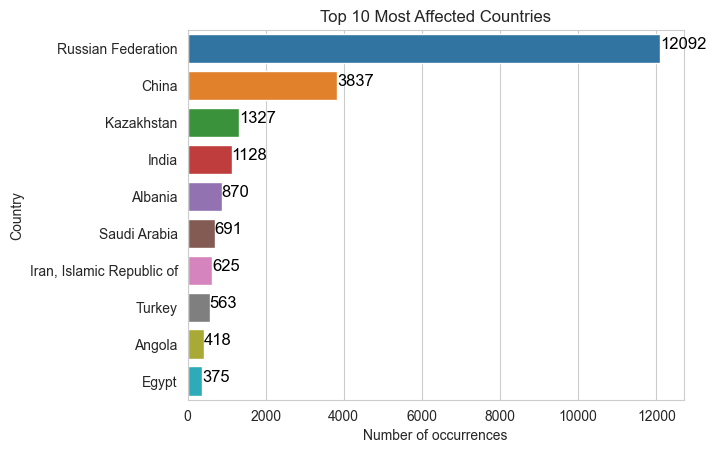

In [15]:
country_count = real_df['country'].value_counts()
country_count = country_count[:10]
sns.set_style("whitegrid")
sns.barplot(x=country_count.values, y=country_count.index)
plt.title('Top 10 Most Affected Countries')
plt.xlabel('Number of occurrences')
plt.ylabel('Country')
for i, v in enumerate(country_count.values):
    plt.text(v, i, str(v), color='black', fontsize=12)

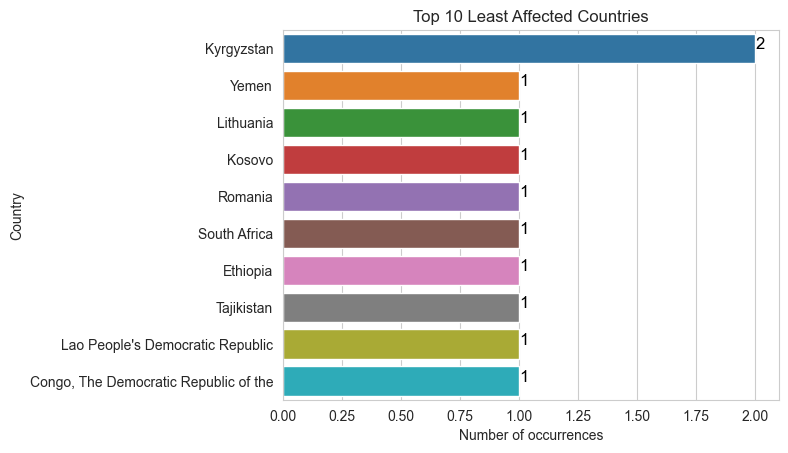

In [16]:
country_count = real_df['country'].value_counts()
country_count = country_count[-10:]
sns.set_style("whitegrid")
sns.barplot(x=country_count.values, y=country_count.index)
plt.title('Top 10 Least Affected Countries')
plt.xlabel('Number of occurrences')
plt.ylabel('Country')
for i, v in enumerate(country_count.values):
    plt.text(v, i, str(v), color='black', fontsize=12)

The Frost day frequency happens to be the most in Europe and the least in Africa. The reason for this is probably that Africa belongs to the hotter part of the globe. Whereas the Asian continent also recieves good amount of frost day frequesncy.

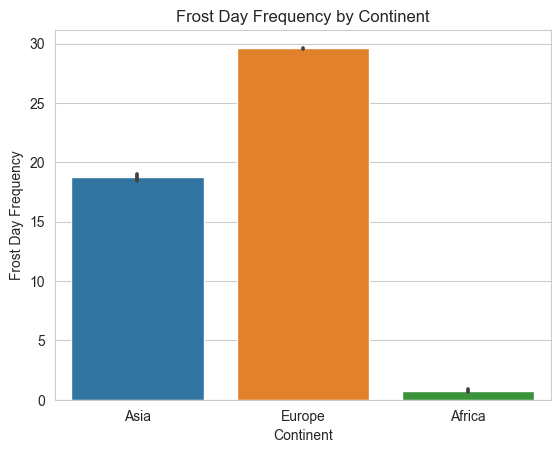

In [17]:
sns.barplot(x=real_df['region'], y=real_df['frost_day_frequency'])
plt.xlabel('Continent')
plt.ylabel('Frost Day Frequency')
plt.title('Frost Day Frequency by Continent')
plt.show()



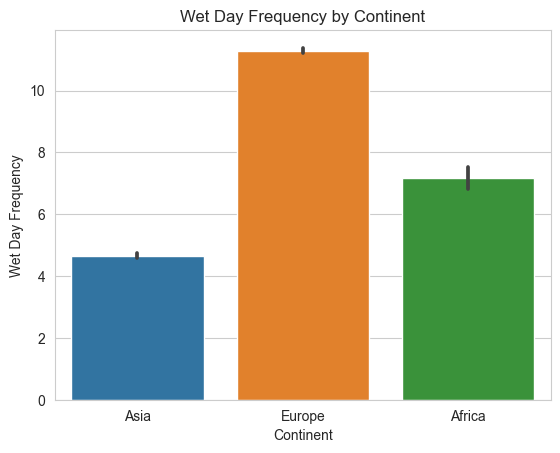

In [18]:
sns.barplot(x=real_df['region'], y=real_df['wet_day'])
plt.xlabel('Continent')
plt.ylabel('Wet Day Frequency')
plt.title('Wet Day Frequency by Continent')
plt.show()

Below map shows the data we have on the entire globe. Here, we can see that the light green region happens to the one with no cases but as we scroll in and look deeper we observe the dark green spots which indicate the occurence of the lumpy disease.

In [19]:
import plotly.express as px

# Assuming 'df' is the DataFrame containing longitude, latitude, and target columns
fig = px.scatter_mapbox(real_df, lat='lat', lon='longitude',hover_name='country',
                        color='lumpy', color_continuous_scale='algae',
                        mapbox_style='open-street-map', zoom=10)

fig.update_layout(title='Geographic Locations with Target Hue',
                  margin=dict(l=0, r=0, t=50, b=0),
                  mapbox=dict(center=dict(lat=real_df['lat'].mean(), lon=real_df['longitude'].mean())))

fig.show()


ModuleNotFoundError: No module named 'plotly'

In [20]:
fig = px.scatter_geo(real_df,lat='lat',lon='longitude')
fig.update_layout(title = 'Lumpy Skin Disease Area', title_x=0.5)
fig.show()

NameError: name 'px' is not defined

Here we observe that most datapoints in this dataset have high altitude and low percipation.

In [ ]:
fig = px.scatter(real_df, x='precipitation', y='elevation', color='lumpy',
                 hover_data=['country'], title='Precipitation vs. Altitude')
fig.show()

Here we observe a strong corelation between daily mean temperature and percipitation. Also note that elevation and percipitation are negatively corelated.

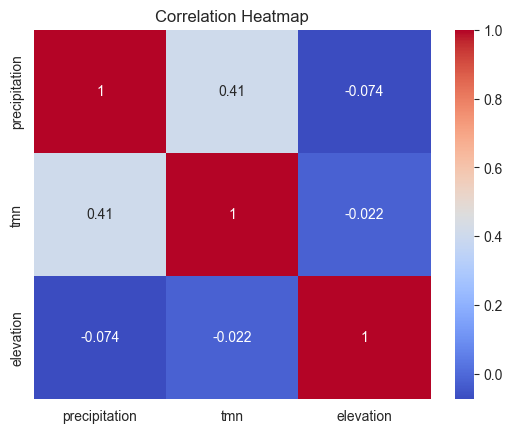

In [21]:
correlation_matrix = real_df[['precipitation', 'tmn', 'elevation']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


**ENCODING**

'Region' column contains the names of the continents of each data point, therefore it is a categorical variable. We can encode this column using one hot encoding.

In [102]:
newdf.head()

,cloud_cover,diurnal_temperature_range,frost_day_frequency,evapotranspiration,precipitation,tmn,tmp,tmx,vap,wet_day,elevation,dominant_land_cover,region
0,41.6,12.8,0.00,2.3,1.7,12.7,19.1,25.5,15.7,0.00,147,2,Asia
1,40.5,13.3,0.00,2.4,0.0,13.2,19.8,26.5,16.3,0.00,145,2,Asia
2,27.3,13.6,0.08,2.3,0.6,9.4,16.2,23.0,13.0,0.98,158,2,Asia
3,45.3,12.8,31.00,0.4,8.8,-22.5,-16.1,-9.7,0.9,4.64,178,2,Asia
4,38.8,13.2,31.00,0.4,10.5,-20.4,-13.8,-7.2,1.2,1.69,185,3,Asia


In [135]:
newdf = real_df[['cloud_cover', 'diurnal_temperature_range', 'frost_day_frequency',
       'evapotranspiration', 'precipitation', 'tmn', 'tmp', 'tmx', 'vap',
       'wet_day', 'elevation', 'dominant_land_cover', 'region']]

In [114]:
real_df.columns

Index(['Unnamed: 0', 'longitude', 'lat', 'cloud_cover',
       'diurnal_temperature_range', 'frost_day_frequency',
       'evapotranspiration', 'precipitation', 'tmn', 'tmp', 'tmx', 'vap',
       'wet_day', 'elevation', 'dominant_land_cover', 'X5_Ct_2010_Da',
       'X5_Bf_2010_Da', 'lumpy', 'country', 'region'],
      dtype='object')

In [152]:
index_no = newdf.columns.get_loc('region')
index_no

12

In [155]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
ct = ColumnTransformer([('ohe',OneHotEncoder(),[12])],remainder= "passthrough")


In [156]:
real_df = ct.fit_transform(newdf)
real_df

array([[  0.  ,   1.  ,   0.  , ...,   0.  , 147.  ,   2.  ],
       [  0.  ,   1.  ,   0.  , ...,   0.  , 145.  ,   2.  ],
       [  0.  ,   1.  ,   0.  , ...,   0.98, 158.  ,   2.  ],
       ...,
       [  1.  ,   0.  ,   0.  , ...,  15.87, 178.  ,   5.  ],
       [  1.  ,   0.  ,   0.  , ...,  16.3 , 180.  ,   3.  ],
       [  1.  ,   0.  ,   0.  , ...,  16.67, 179.  ,   3.  ]])

**SCALING**

Dividing the dataset into independent and the dependent dataset.

In [117]:
X = real_df[['cloud_cover',
       'diurnal_temperature_range', 'frost_day_frequency',
       'evapotranspiration', 'precipitation', 'tmn', 'tmp', 'tmx', 'vap',
       'wet_day', 'elevation', 'dominant_land_cover','region']]
Y = real_df['lumpy']

The dataset is further divided into test and train with a 70-30 ratio.

In [118]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X, Y,
                                               test_size=0.30,
                                               random_state=2)

Now that we are done with cleaning, encoding and cleaning we need to scale our variables before the data enters the model.

In [139]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Instantiate MinMaxScaler and use it to rescale X_train and X_test
scaler = MinMaxScaler(feature_range=(0,1))
rescaledX_train = scaler.fit_transform(xTrain)
rescaledX_test = scaler.fit_transform(xTest)

ValueError: could not convert string to float: 'Asia'

# **ML**

Importing important machine learning libraries.

In [124]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from pandas import DataFrame
from xgboost import XGBClassifier

ModuleNotFoundError: No module named 'xgboost'

Since the given problem is about classifying one variable with help of other independent variables, we have defined and trained Logistic Regression model on the training dataset.

In [125]:
from sklearn.linear_model import LogisticRegression
# Instantiate a LogisticRegression classifier with default parameter values
logreg = LogisticRegression()
logreg.fit(rescaledX_train, yTrain)

LogisticRegression()

Here we can finally predict the independent variable using the other variables in the dataset.

In [126]:
from sklearn import metrics
y_pred_test_logreg = logreg.predict(rescaledX_test)
y_pred_train_logreg = logreg.predict(rescaledX_train)


Then we calculate the accuracy of the model, using a confusion matrix and accuracy score.

In [128]:
print("Test: Accuracy = ", logreg.score(rescaledX_test,yTest))
print("Train: Accuracy = ", logreg.score(rescaledX_train,yTrain))

confusion_matrix = metrics.confusion_matrix(yTest,y_pred_test_logreg)
print(confusion_matrix)

Test: Accuracy =  0.9461093938986695
Train: Accuracy =  0.9540375532772722
[[6445   74]
 [ 327  595]]


Above code shows that the train accuracy is 95% and the test accuracy is 94% which is satisfactory.

In [157]:
import pickle
pickle.dump(logreg,open('model.pkl','wb') )
import pickle
pickle.dump(scaler,open('scale.pkl','wb') )

In [158]:
import joblib
joblib.dump(ct,'column')

['column']

In [42]:
real_df.head()

,Unnamed: 0,longitude,lat,cloud_cover,diurnal_temperature_range,frost_day_frequency,evapotranspiration,precipitation,tmn,tmp,...,wet_day,elevation,dominant_land_cover,X5_Ct_2010_Da,X5_Bf_2010_Da,lumpy,country,region_Africa,region_Asia,region_Europe
0,0,90.380931,22.437184,41.6,12.8,0.00,2.3,1.7,12.7,19.1,...,0.00,147,2,27970.983100,3691.746950,1,Bangladesh,False,True,False
1,1,87.854975,22.986757,40.5,13.3,0.00,2.4,0.0,13.2,19.8,...,0.00,145,2,25063.646690,671.326701,1,India,False,True,False
2,2,85.279935,23.610181,27.3,13.6,0.08,2.3,0.6,9.4,16.2,...,0.98,158,2,6038.477155,1426.839831,1,India,False,True,False
3,3,81.564510,43.882221,45.3,12.8,31.00,0.4,8.8,-22.5,-16.1,...,4.64,178,2,760.703340,0.000000,1,China,False,True,False
4,4,81.161057,43.834976,38.8,13.2,31.00,0.4,10.5,-20.4,-13.8,...,1.69,185,3,270.367426,0.000000,1,China,False,True,False


In [34]:
real_df.columns

Index(['Unnamed: 0', 'longitude', 'lat', 'cloud_cover',
       'diurnal_temperature_range', 'frost_day_frequency',
       'evapotranspiration', 'precipitation', 'tmn', 'tmp', 'tmx', 'vap',
       'wet_day', 'elevation', 'dominant_land_cover', 'X5_Ct_2010_Da',
       'X5_Bf_2010_Da', 'lumpy', 'country', 'region_Africa', 'region_Asia',
       'region_Europe'],
      dtype='object')

'cloud_cover',
       'diurnal_temperature_range', 'frost_day_frequency',
       'evapotranspiration', 'precipitation', 'tmn', 'tmp', 'tmx', 'vap',
       'wet_day', 'elevation', 'dominant_land_cover','region_Africa', 'region_Asia',
       'region_Europe'

In [45]:
model = pickle.load(open('model.pkl','rb'))
scale = pickle.load(open('scale.pkl','rb'))

In [60]:
scaled =scale.fit_transform([['41.6','12.8','0.00','2.3','1.7','12.7','19.1','25.5','15.7','0.00','147','2','0','1','0']])

In [159]:
model_predict = model.predict(ct.transform([['41.6','12.8','0.00','2.3','1.7','12.7','19.1','25.5','15.7','0.00','147','2','Europe']]))
print(model_predict)

[0]


We now choose another classification algorithm. In the below KNN algorithm we can the best number of neighbours for this dataset is 3.

Text(0, 0.5, 'Error Rate')

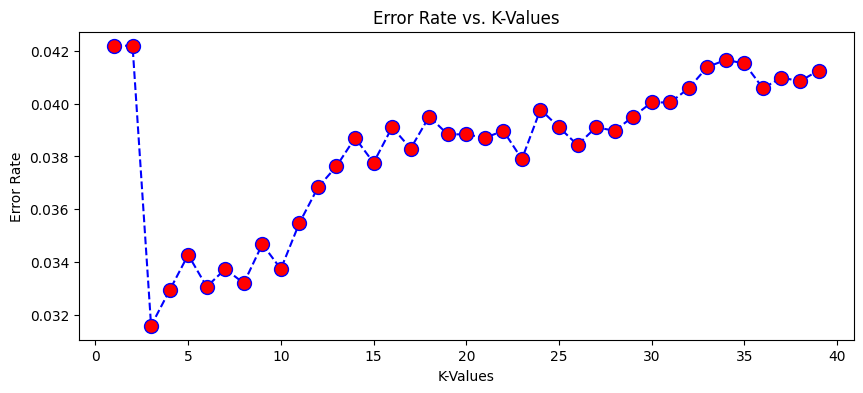

In [ ]:
# import numpy
import numpy as np
error_rate = []
# searching k value upto  40
for i in range(1,40):
    # knn algorithm
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(rescaledX_train, yTrain)
    # testing the model
    y_pred_test_knn = knn.predict(rescaledX_test)
    #training the model
    y_pred_train_knn = knn.predict(rescaledX_train)

    error_rate.append(np.mean(y_pred_test_knn != yTest))
# Configure and plot error rate over k values
plt.figure(figsize=(10,4))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K-Values')
plt.xlabel('K-Values')
plt.ylabel('Error Rate')

Accuracy score of the above model is calculated below.

In [ ]:
test_acc_knn = accuracy_score(yTest, y_pred_test_knn)
train_acc_knn = accuracy_score(yTrain,y_pred_train_knn)
print('Train score:',train_acc_knn,'Test score:',test_acc_knn)
print(i,'Train score:',train_acc_knn,'Test score:',test_acc_knn)

Train score: 0.9629650961870753 Test score: 0.9587421045558393
39 Train score: 0.9629650961870753 Test score: 0.9587421045558393


We choose decision tree classifier as another classification model for this dataset.

In [ ]:
test_acc=[]
list_score=[]


for i in range(1, 10):
    dtc = DecisionTreeClassifier(max_depth = i ,random_state = 0)
    dtc.fit(xTrain, yTrain)
    train_pred = dtc.predict(xTrain)
    test_pred = dtc.predict(xTest)
    test_acc = accuracy_score(yTest, test_pred)
    train_acc = accuracy_score(yTrain, train_pred)
    print(i,'Train score:',train_acc,'Test score:',test_acc)
    list_score.append([i,accuracy_score(train_pred, yTrain),accuracy_score(test_pred, yTest)])



1 Train score: 0.9000115194102062 Test score: 0.8955785512699906
2 Train score: 0.9206888607303306 Test score: 0.9160059131837118
3 Train score: 0.9517912682870637 Test score: 0.9482596425211665
4 Train score: 0.9606036170948048 Test score: 0.9563230748555301
5 Train score: 0.9634258725953231 Test score: 0.9571294180889666
6 Train score: 0.9670544868102753 Test score: 0.9600860099448999
7 Train score: 0.9708558921783205 Test score: 0.9610267437172423
8 Train score: 0.9752908651077065 Test score: 0.9623706491063029
9 Train score: 0.9785162999654418 Test score: 0.9641177261120817


A lineplot explaining the accuracy and the depth on the test and train models.

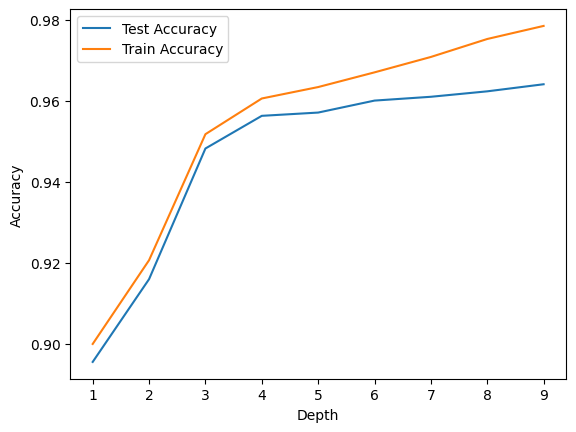

In [ ]:
df2 = DataFrame (list_score,columns=['Depth','Train Accuracy','Test Accuracy'])
plt.plot(df2['Depth'],df2['Test Accuracy'],label='Test Accuracy')
plt.plot(df2['Depth'],df2['Train Accuracy'],label='Train Accuracy')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.legend()

Finally we use XGBoost classifier as our last model.

In [ ]:
model = XGBClassifier()
model.fit(xTrain, yTrain)
y_pred_train_xg= model.predict(xTrain)
y_pred_test_xg = model.predict(xTest)
test_acc = accuracy_score(yTest, y_pred_test_xg)
train_acc = accuracy_score(yTrain, y_pred_train_xg)
print('Train score:',train_acc,'Test score:',test_acc)

Train score: 0.9838152286602926 Test score: 0.9702996909017605
